In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

   fat_tot  carbohydrates_tot  sugar  proteins
0      0.1                  5      0       0.3
1      0.1                 10      0       0.5
2      0.1                 10      0       1.0
3      0.1                 10      0       1.0
4      0.1                 75      9       6.0
0     3
1     4
2     5
3     5
4    70
Name: calories, dtype: int64
    fat_tot  carbohydrates_tot     sugar  proteins
0 -0.186916          -0.362887 -0.390881 -0.334336
1 -0.186916          -0.348182 -0.390881 -0.324336
2 -0.186916          -0.348182 -0.390881 -0.299336
3 -0.186916          -0.348182 -0.390881 -0.299336
4 -0.186916          -0.157005 -0.283738 -0.049336


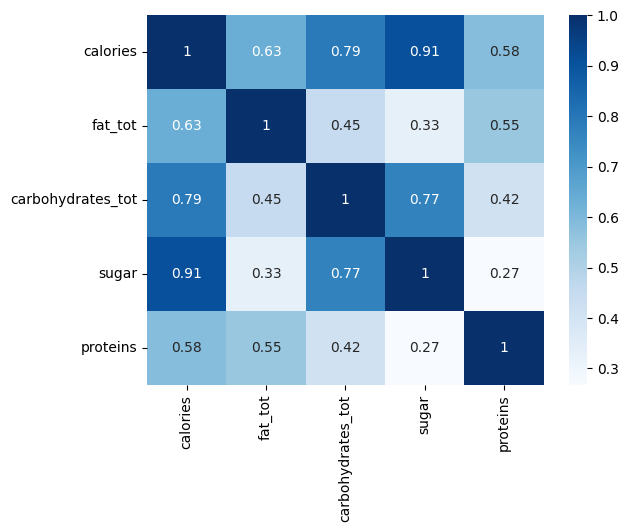

In [51]:
data = pd.read_csv('./starbucks_calories.csv')
plot_data = data.drop(['drink_id', 'beverage'], axis=1)
x = data.drop(['calories', 'drink_id', 'beverage'], axis=1)
y = data['calories']
corelation_data = plot_data.corr('pearson')
sb.heatmap(corelation_data, cmap='Blues', annot=True)
print(x.head())
print(y.head())

def mean_norm(x):
    mean = np.mean(x, axis=0)
    max = np.max(x, axis=0)
    min = np.min(x, axis=0)
    return (x - mean) / (max - min)

x = mean_norm(x)

print(x.head())

In [123]:
m = x.shape[0] # number of records
n = x.shape[1] # number of features
w = np.zeros(n)
b = 0

def gradient_descent(x, y, w, b, n, m, epochs, alpha):
    for epoch in range(epochs):
        w_temp = w - (alpha * gradient_w_cost(x, y, w, b, m))
        b_temp = b - (alpha * gradient_b_cost(x, y, w, b, m))
        w = w_temp
        b = b_temp

        if (epoch % 100 == 0):
            print(cost(x, y, w, b, m))
    return w, b

def cost(x, y, w, b, m):
    return np.sum((np.dot(x, w) + b - y)**2) / (2 * m)

def gradient_w_cost(x, y, w, b, m):
    return np.dot(x.T, np.dot(x, w) + b - y) / (m)

def gradient_b_cost(x, y, w, b, m):
    return np.sum((np.dot(x, w) + b - y)) / (m)

def recommend(x, w, b):
    return np.dot(x, w) + b

In [124]:
w, b = gradient_descent(x, y, w, b, n, m, epochs=1000, alpha=1.67)

11806.134558560121
51.015800235989296
44.547953638938
44.434213334306946
44.43221101016725
44.4321757581832
44.432175137550615
44.43217512662399
44.43217512643161
44.43217512642824


In [125]:
print(w, b)

[130.7342122   -6.30135682 338.8957059  102.96224038] 193.34854771784234


In [ ]:
print(recommend(x.iloc[4], w, b))

68.66414762580672
